In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import preprocess as p
import explore as ex
import evaluate as e

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = w.clean_zillow()
df.head()

found data


,bedrooms,bathrooms,square_ft,tax_value,year,county
0,4,3.5,3100,1023282,1998,Orange
1,2,1.0,1465,464000,1967,Ventura
2,3,2.0,1243,564778,1962,Orange
3,4,3.0,2376,145143,1970,Los Angeles
4,4,3.0,2962,773303,1950,Los Angeles


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52241 entries, 0 to 52440
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   52241 non-null  int64  
 1   bathrooms  52241 non-null  float64
 2   square_ft  52241 non-null  int64  
 3   tax_value  52241 non-null  int64  
 4   year       52241 non-null  int64  
 5   county     52241 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.8+ MB


In [4]:
ex.bin_data(df)

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,max_square_ft_bin,decade,total_rooms
0,4,3.5,3100,1023282,1998,Orange,3,4,3500,1990,7.5
1,2,1.0,1465,464000,1967,Ventura,1,2,1500,1960,3.0
2,3,2.0,1243,564778,1962,Orange,2,3,1500,1960,5.0
3,4,3.0,2376,145143,1970,Los Angeles,3,4,2500,1970,7.0
4,4,3.0,2962,773303,1950,Los Angeles,3,4,3000,1950,7.0
...,...,...,...,...,...,...,...,...,...,...,...
52436,4,2.0,1633,346534,1962,Los Angeles,2,4,2000,1960,6.0
52437,2,2.0,1286,354621,1940,Los Angeles,2,2,1500,1940,4.0
52438,4,2.0,1612,67205,1964,Ventura,2,4,2000,1960,6.0
52439,3,1.0,1032,49546,1954,Los Angeles,1,3,1500,1950,4.0


In [5]:
train, val, test = p.split_data(df)

In [6]:
train.head()

,bedrooms,bathrooms,square_ft,tax_value,year,county,bathrooms_binned,bedrooms_binned,max_square_ft_bin,decade,total_rooms
44648,4,2.0,1430,316414,1946,Los Angeles,2,4,1500,1940,6.0
33031,2,1.0,1547,66845,1938,Los Angeles,1,2,2000,1930,3.0
810,3,2.0,2051,474197,1985,Ventura,2,3,2500,1980,5.0
11555,3,4.0,2603,256558,1948,Los Angeles,4,3,3000,1940,7.0
33070,3,3.0,2953,1155958,2000,Orange,3,3,3000,2000,6.0


<Axes: >

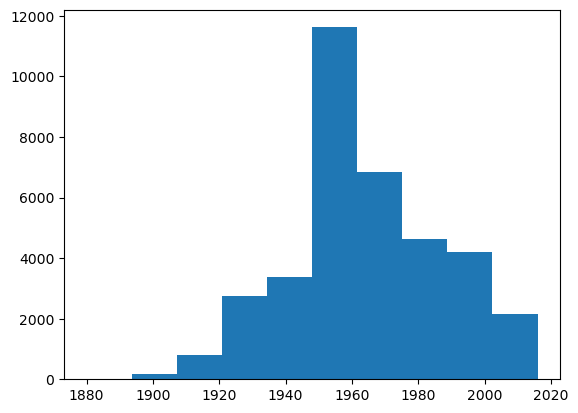

In [7]:
train.year.hist(grid = False)

<Axes: >

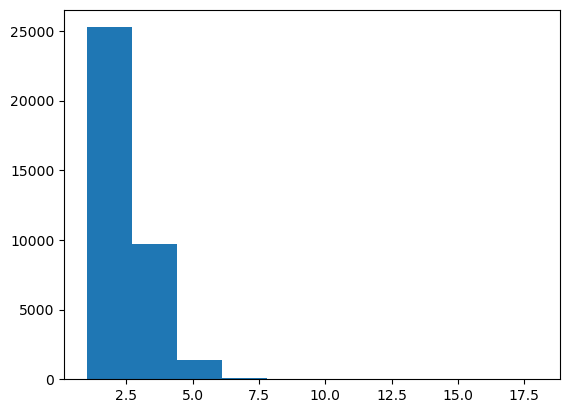

In [8]:
train.bathrooms.hist(grid = False)

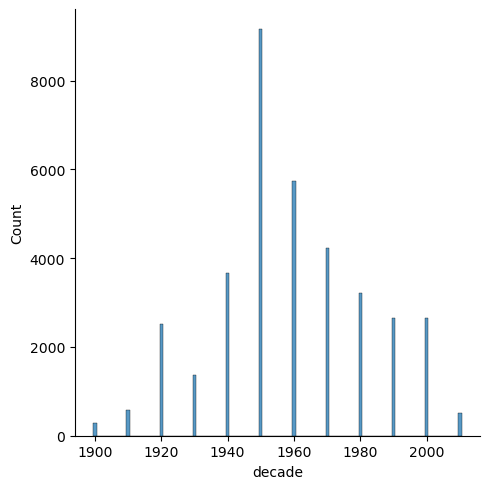

In [9]:
sns.displot(x = 'decade', data = train)

does bedrooms

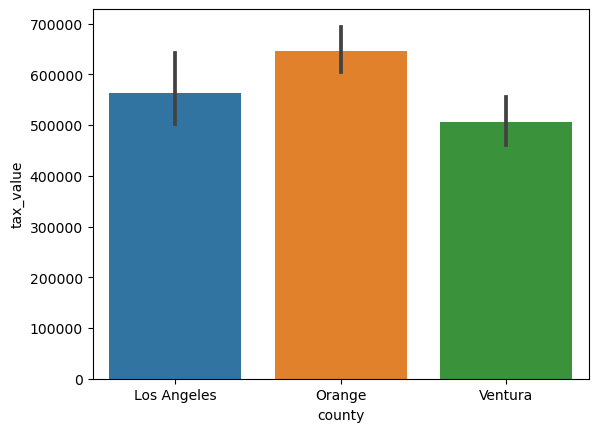

In [10]:
sns.barplot(data = df.sample(3_000), x='county', y='tax_value')
plt.show()

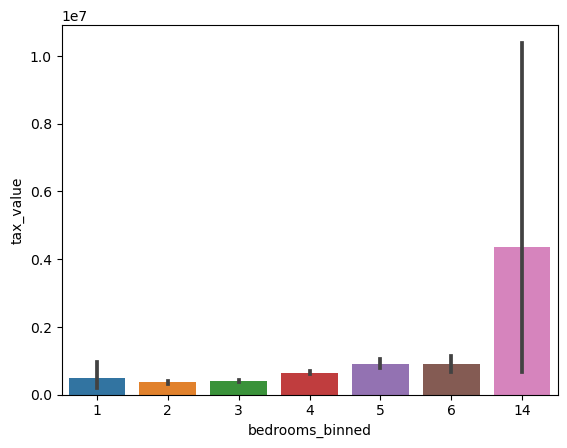

In [11]:
sns.barplot(data = train.sample(3_000), x='bedrooms_binned', y='tax_value')
plt.show()

In [26]:
def bar_plt(df, feature, target):
    cols = ['grey', 'skyblue', 'steelblue']
    ax = sns.barplot(data = df, x = feature, y = target, errorbar = None, palette = cols)
    ax = plt.gca()
    for p in ax.patches:
        value = int(p.get_height())  # Get the height (value) of each bar
        if value != 0:  # Exclude zero values
            label = f"${value:,}"  # Format value with commas
            if value == 3218184:  # Customize the label for the highest value
                ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom", fontweight="bold")
            else:
                ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom")
    new_labels = ['0-1', '0-3', 'Category 3', 'Category 4']
    plt.xticks(range(len(new_labels)), new_labels)
    plt.xlabel('Bedrooms')
    plt.ylabel('Tax Value')
    plt.yticks([])
    sns.despine(ax=ax, left=True, bottom=True)
    ax.yaxis.set_visible(False)
    plt.title("Average tax value", y= 1.10)  # Set the title
    plt.show()

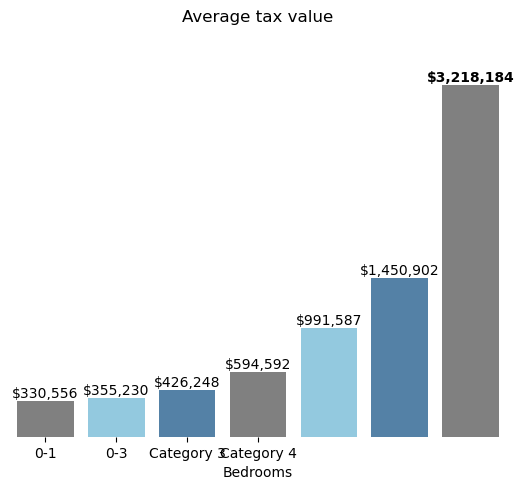

In [27]:
bar_plt(train, 'bedrooms_binned', 'tax_value')

In [20]:
def bar_plt2(df, feature, target):
    cols = [ 'silver', 'steelblue']
    ax = sns.barplot(data = df, x = feature, y = target, errorbar = None, palette = cols)
    ax = plt.gca()
    for p in ax.patches:
        value = int(p.get_height())  # Get the height (value) of each bar
        if value != 0:  # Exclude zero values
            label = f"${value:,}"  # Format value with commas
            if value == 1439645:  # Customize the label for the highest value
                ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom", fontweight="bold")
            else:
                ax.text(p.get_x() + p.get_width() / 2, p.get_height(), label, ha="center", va="bottom", fontsize = 10)
    
    plt.xlabel('Square Ft')
    plt.ylabel('Tax Value')
    plt.yticks([])
    sns.despine(ax=ax, left=True, bottom=True)
    ax.yaxis.set_visible(False)
    plt.title("Average tax value", y= 1.10)  # Set the title
    plt.show()

In [21]:
bar_plt2(train, 'square_ft_binned', 'tax_value')

ValueError: Could not interpret input 'square_ft_binned'

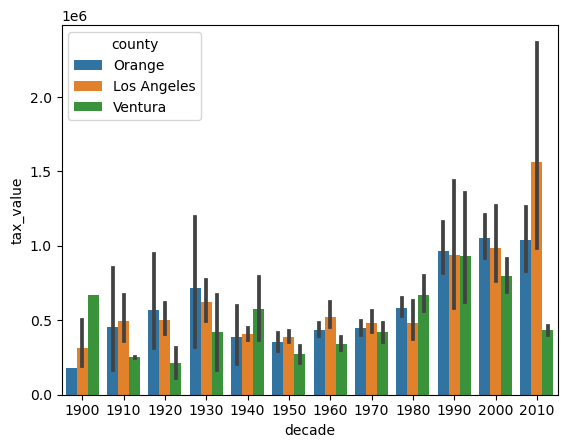

In [31]:
sns.barplot(data = train.sample(3_000), x='decade', y='tax_value', hue = 'county')
plt.show()

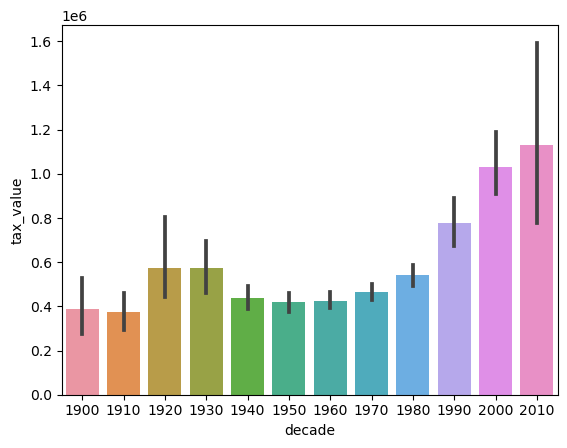

In [29]:
sns.barplot(data = train.sample(3_000), x='decade', y='tax_value')
plt.show()

In [30]:
sns.barplot(data = train.sample(3_000), x='square_ft_binned', y='tax_value', hue = 'county')
plt.show()

ValueError: Could not interpret input 'square_ft_binned'

In [ ]:
sns.barplot(data = train.sample(3_000), x='square_ft_binned', y='tax_value')
plt.show()

In [ ]:
train.head()

In [ ]:
def drop_binned_features(train, val, test):

    train = train.drop(columns = ['bathrooms', 'bedrooms', 'square_ft'])
    val = val.drop(columns = ['bathrooms', 'bedrooms', 'square_ft'])
    test = test.drop(columns = ['bathrooms', 'bedrooms', 'square_ft'])

    return train, val, test

In [ ]:
train, val, test = drop_binned_features(train, val, test)
train.head()

In [ ]:
to_scale = ['year']
train, val, test = w.scale_data(train, val, test, to_scale)

In [ ]:
train, val, test = p.dummies(train, val, test)

In [ ]:
X_train, y_train = p.xy_split(train)
X_val, y_val = p.xy_split(val)

In [ ]:
X_train.head()

In [ ]:
skb = SelectKBest(f_regression, k = 3)

skb.fit(X_train, y_train)

In [ ]:
skb_mask = skb.get_support()

X_train.columns[skb_mask]

In [ ]:
y_train.median(), y_train.mean()

In [ ]:
baselines = pd.DataFrame({'y_actual': y_train,
                         'y_mean': y_train.mean(),
                         'y_median': y_train.median()})

baselines.head()

In [ ]:
m.eval_model(baselines.y_actual, baselines.y_mean)

In [ ]:
m.eval_model(baselines.y_actual, baselines.y_median)

In [ ]:
lm = LinearRegression()

m.train_model(lm, X_train, y_train, X_val, y_val)

In [ ]:
xgbr = XGBRegressor()

m.train_model(xgbr, X_train, y_train, X_val, y_val)

In [ ]:
train.info()

In [ ]:
poly = PolynomialFeatures()
X_train_second = poly.fit_transform(X_train)
X_val_second = poly.fit_transform(X_val)

In [ ]:
lm = LinearRegression()

m.train_model(lm, X_train_second, y_train, X_val_second, y_val)

In [ ]:
len(df[df.year < 1900])